In [21]:
# Import Dependencies 
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import datetime
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# For scraping with Chrome

executable_path={'executable_path':ChromeDriverManager().install()}

browser=Browser('chrome', **executable_path, headless=False)

In [23]:
# URL of page to be scraped

url='https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

browser.visit(url)

In [24]:
html = browser.html

soup = bs(html, 'lxml')

headers=[]

table = soup.find('table', class_='table')

for head in table.find_all('th'):
    header= head.text

    headers.append(header)


df=pd.DataFrame(columns=headers)

In [25]:
for rowData in table.find_all('tr')[1:]:#scrap row from second row
    dataInRow =rowData.find_all('td')
    row = [i.text for i in dataInRow]
    length = len(df)
    df.loc[length] = row #insert data
  
 
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
browser.quit()

In [27]:
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [28]:
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d')
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

In [29]:
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [30]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [31]:
df.to_csv('temperatureData.csv')

In [32]:
# how many months are there on Mars?
df['month'].nunique()

12

In [33]:
# how many Martian (not Earth) days' worth of data are there in the scraped dataset?
df['sol'].nunique()

1867

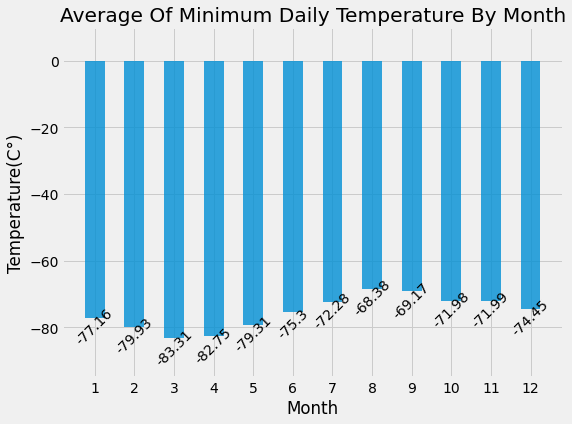

The coldest month on Mars is month 3 with temperature -83.31°C
The warmest month on Mars is month 8 with temperature -68.38°C


In [34]:
# what are the coldest and warmest months on Mars (at the location of Curiosity)? 
# Obtain the answer by averaging the minimum daily temperature of each month.
# Plot the results as a bar plot.

groupedByMonth = df.groupby('month')['min_temp'].mean()

groupedByMonth=round(groupedByMonth,2)

x_tick=groupedByMonth.index.values
x_axis=np.arange(0,len(x_tick))
plt.figure(figsize=(8,6))
plt.bar(x_axis,groupedByMonth,alpha=0.8,
        align="center",width=0.5)

for x,y in enumerate(groupedByMonth):
    plt.text(x,y-8,'%s'%y,ha='center',rotation=45)
    
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_tick)
plt.title('Average Of Minimum Daily Temperature By Month')
plt.xlabel('Month')
plt.ylabel('Temperature(C°)')
plt.ylim(-95,10)
plt.show();

print(f'The coldest month on Mars is month {groupedByMonth.idxmin()} with temperature {min(groupedByMonth)}°C')
print(f'The warmest month on Mars is month {groupedByMonth.idxmax()} with temperature {max(groupedByMonth)}°C')

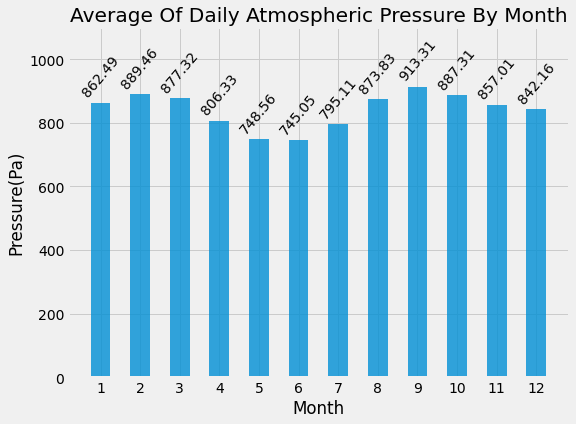

The lowest atmospheric pressure on Mars is month 6 with pressure 745.05
The highest atmospheric pressure on Mars is month 9 with pressure 913.31


In [35]:
# which months have the lowest and highest atmospheric pressure on Mars? 
# Obtain the answer by averaging the daily atmospheric pressure of each month. 
# Plot the results as a bar plot.

groupedByPressure = df.groupby('month')['pressure'].mean()

groupedByPressure=round(groupedByPressure,2)

x_tick=groupedByPressure.index.values
x_axis=np.arange(0,len(x_tick))
plt.figure(figsize=(8,6))
plt.bar(x_axis,groupedByPressure,alpha=0.8,
        align="center",width=0.5)

for x,y in enumerate(groupedByPressure):
    plt.text(x,y+20,'%s'%y,ha='center',rotation=50)
    
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,x_tick)
plt.title('Average Of Daily Atmospheric Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Pressure(Pa)')
plt.ylim(0,1100)
plt.show();

print(f'The lowest atmospheric pressure on Mars is month {groupedByPressure.idxmin()} with pressure {min(groupedByPressure)}')
print(f'The highest atmospheric pressure on Mars is month {groupedByPressure.idxmax()} with pressure {max(groupedByPressure)}')

In [36]:
# approximately how many terrestrial (earth) days are there in a Martian year? 
# In other words, in the time that Mars circles the Sun once, how many days elapse on the Earth? 
# Estimate the result visually by plotting the daily minimum temperature.

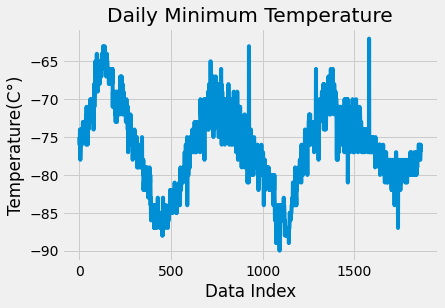

In [37]:
df['min_temp'].plot()
plt.title('Daily Minimum Temperature')
plt.xlabel('Data Index')
plt.ylabel('Temperature(C°)')
plt.show()

In [38]:
print(f'Approximately, there are {round(len(df)/3,2)} of terrestrial (earth) days in a Martian year')

Approximately, there are 622.33 of terrestrial (earth) days in a Martian year
